In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating activation function
#step-function
def unit_step(x):
    return 1 if x>0 else 0

#sign
def signum(x):
    return 1 if x>0 else (0 if x==0 else -1)

#linear
def linear(x):
    return x

#sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#tanh
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [3]:
#applying the same
activated_vals = {5:[],6:[],7:[],8:[],9:[],10:[]}
for i in range(5, 11):
    activated_vals[i].append(unit_step(i))
    activated_vals[i].append(signum(i))
    activated_vals[i].append(linear(i))
    activated_vals[i].append(sigmoid(i))
    activated_vals[i].append(tanh(i))

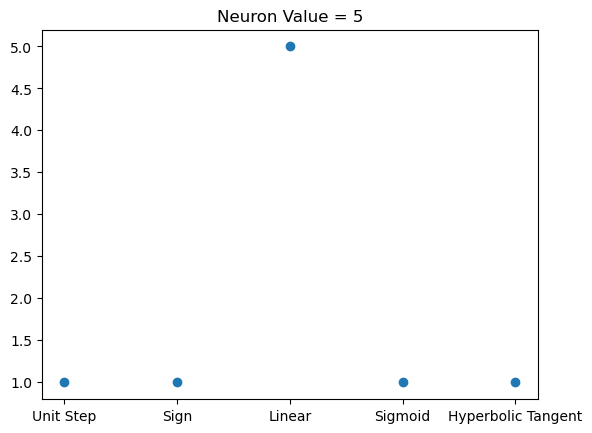

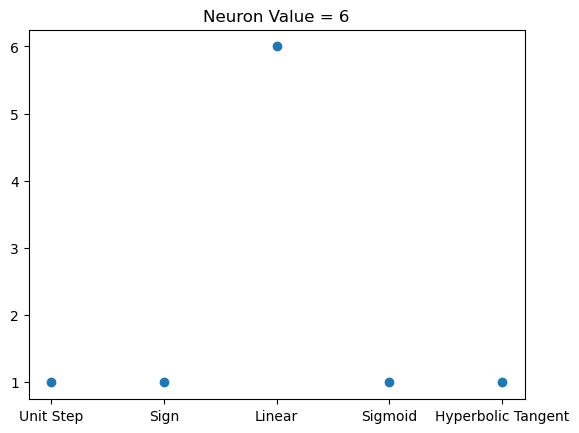

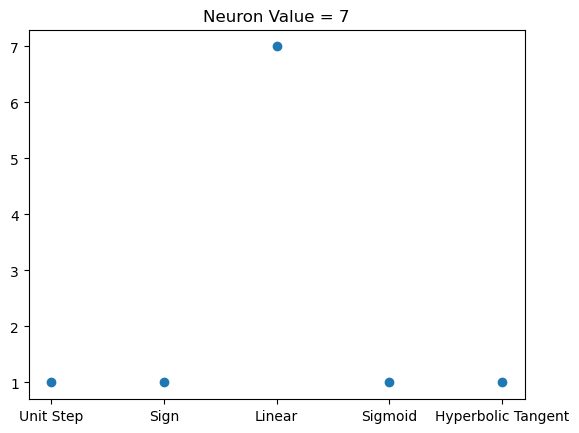

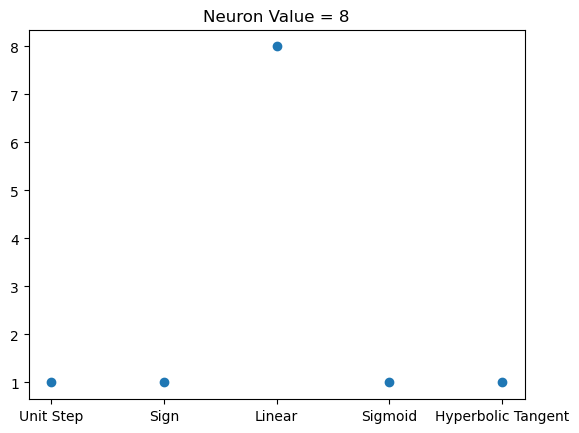

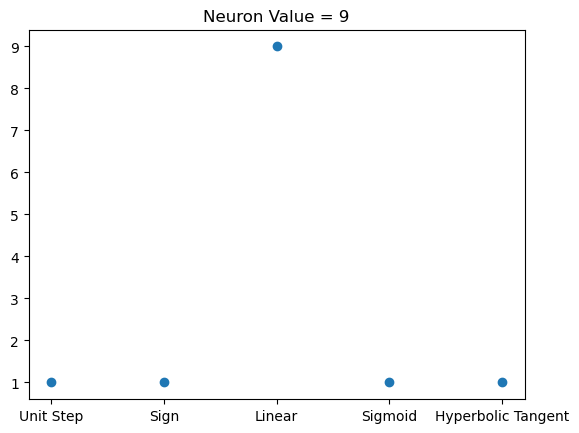

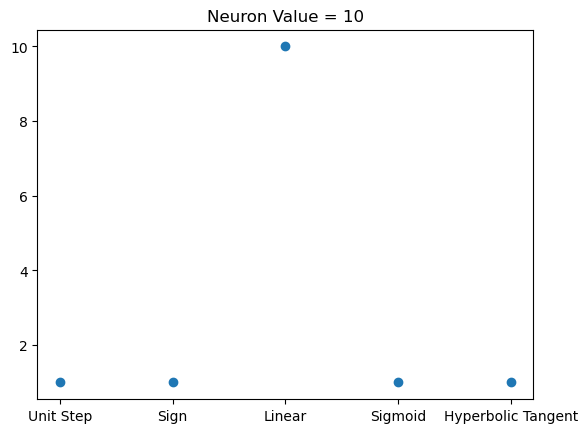

In [4]:
#plotting the same
for _ in activated_vals.keys():
    plt.scatter(x=['Unit Step', 'Sign', 'Linear', 'Sigmoid', 'Hyperbolic Tangent'], y=activated_vals[_])
    plt.title(f"Neuron Value = {_}")
    plt.show()

In [5]:
#importing iris dataset
from sklearn.datasets import load_iris
X = load_iris().data[...,0]
y = load_iris().target

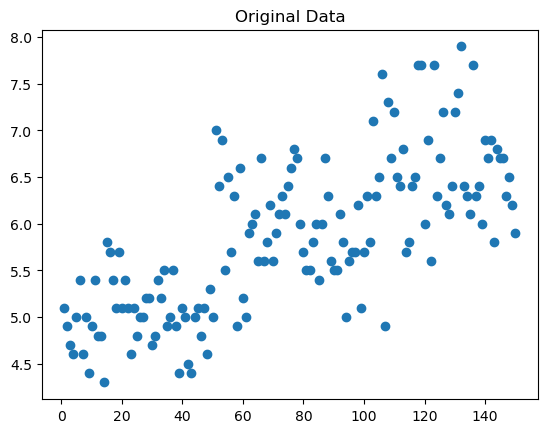

In [6]:
plt.scatter(range(1, len(X)+1), X)
plt.title("Original Data")
plt.show()

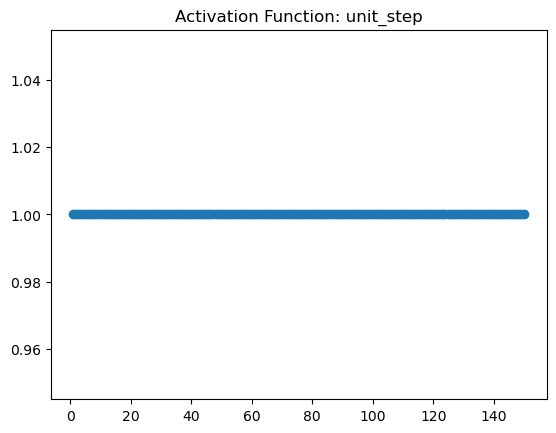

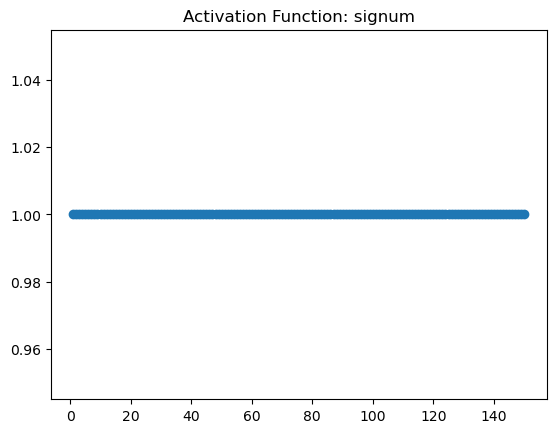

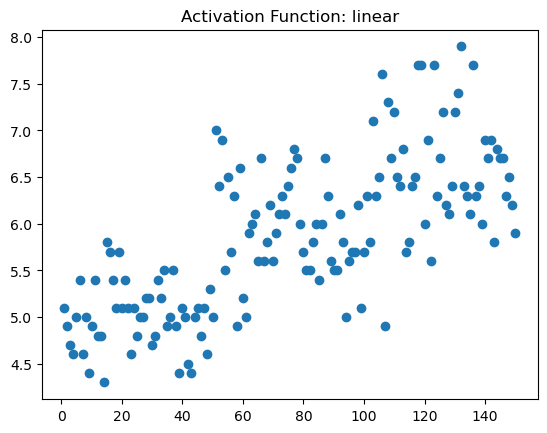

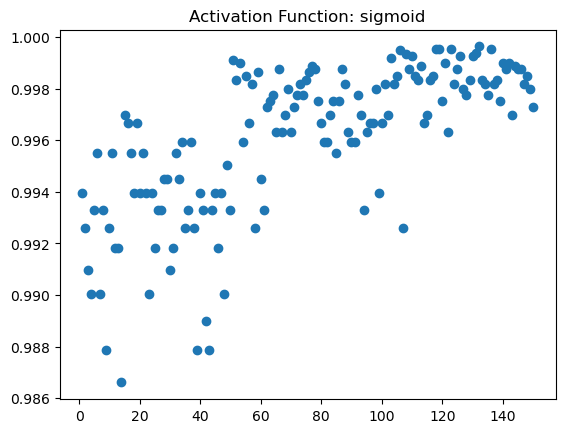

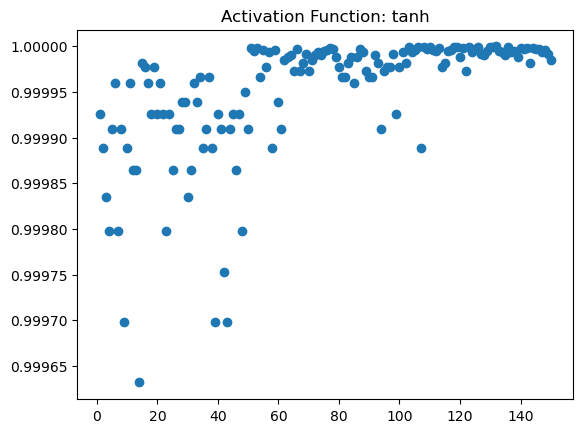

In [7]:
#applying activation function
for _ in [unit_step, signum, linear, sigmoid, tanh]:
    plt.scatter(range(1, len(X)+1), pd.Series(X).apply(lambda x: _(x)))
    plt.title(f"Activation Function: {_.__name__}")
    plt.show()
    

In [8]:
#creating a perceptron
class Perceptron:
        
    #constructor
    def __init__(self, alpha=0.01, n_iter=500):
        self.alpha = alpha
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.error_per_iter = list()
        
    #activation function
    def activation(self, value):
        #we are using the heaviside step function
        return np.where(value>0, 1, 0)
    
    #updating the weights
    def update_weights(self, x, y, y_pred):
        #calculating the error
        error = y-y_pred
        self.error_per_iter.append(error)
        #updating the weights
        self.weights = self.weights + (self.alpha*error)*x
        self.bias = self.bias + (self.alpha*error)
        
    #fitting the data
    def fit(self, X, y):
        n_rows, n_cols = X.shape
        
        #initializing the weights and biases as given in the question
        self.weights = [0.5, 0.243]
        self.bias=0.2
        
        #running a for loop for a given number of iterations
        for _ in range(self.n_iter):
            #going through the data one row at a time
            for idx, x in enumerate(X):
                #calculating the output
                output = np.dot(x, self.weights) + self.bias
                #activating the output
                activated_output = self.activation(output)
                #updating the weights
                self.update_weights(x, y[idx], activated_output)
                
    #predicted new values
    def predict(self, x):
        output = self.activation(np.dot(x, self.weights) + self.bias)
        return output

In [9]:
#creating data for AND gate
AND = pd.DataFrame([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,1]], columns=['x1', 'x2', 'y'])

AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


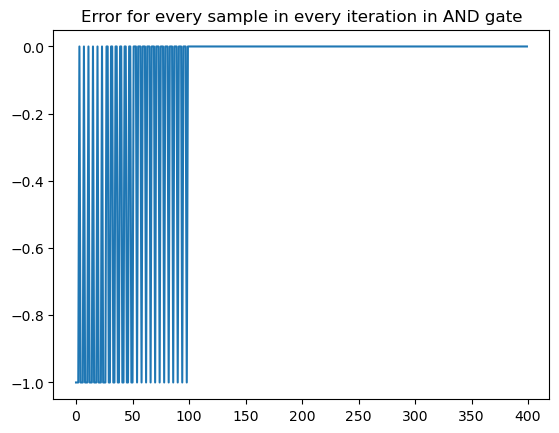

In [10]:
#applying the perceptron
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(AND.drop('y', axis=1).values, AND['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in AND gate")
plt.show()

In [11]:
#creating data for OR gate
OR = pd.DataFrame([[0,0,0],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]], columns=['x1', 'x2', 'y'])

OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


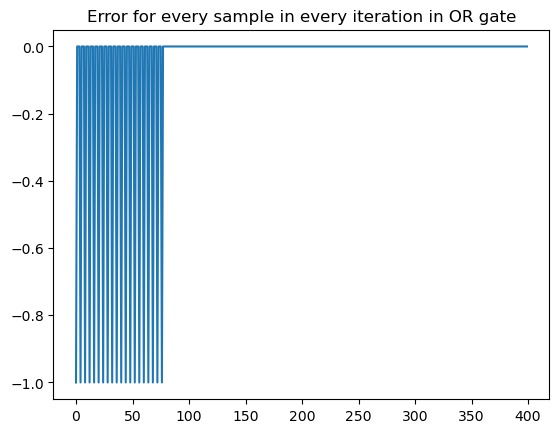

In [12]:
#applying the perceptron
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(OR.drop('y', axis=1).values, OR['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in OR gate")
plt.show()

In [13]:
#creating data for XOR gate
XOR = pd.DataFrame([[0,0,0],
                  [0,1,1],
                  [1,0,1],
                  [1,1,0]], columns=['x1', 'x2', 'y'])

XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


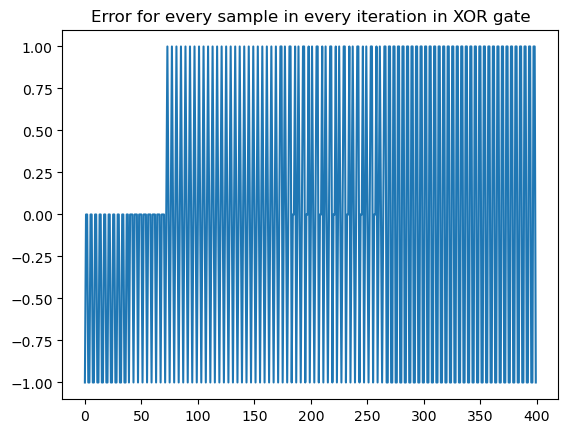

In [14]:
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(XOR.drop('y', axis=1).values, XOR['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in XOR gate")
plt.show()

Perceptron was able to separate linearly separable data but failed on XOR